# Data Preprocessing in Python

It involves cleaning, transforming and organizing raw data to ensure it is accurate, consistent and ready for modeling.

Organized data supports better Exploratory Data Analysis (EDA), making patterns and trends more interpretable.



# Steps-by-Step implementation

## 1: Import Libraries and Load Dataset

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt # Or import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from lib import datasetAuxiliarFunctions as daux


In [47]:
diabetesDf= pd.read_csv("../datasets/diabetes.csv")
diabetesDf.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## 2: Inspect Data Structure and Check Missing Values

We understand dataset size, data types and identify any incomplete (missing) data that needs handling.

**df.info()**:
Prints concise summary including count of non-null entries and data type of each column.

In [48]:
diabetesDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**df.isnull().sum()**: Returns the number of missing values per column.

In [49]:
diabetesDf.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## 3: Statistical Summary and Visualizing Outliers

Get numeric summaries like mean, median, min/max and detect unusual points (outliers). Outliers can skew models if not handled.

**df.describe()**: Computes count, mean, std deviation, min/max and quartiles for numerical columns.

In [50]:
diabetesDf.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**Boxplots**: Visualize spread and detect outliers using matplotlib’s boxplot().

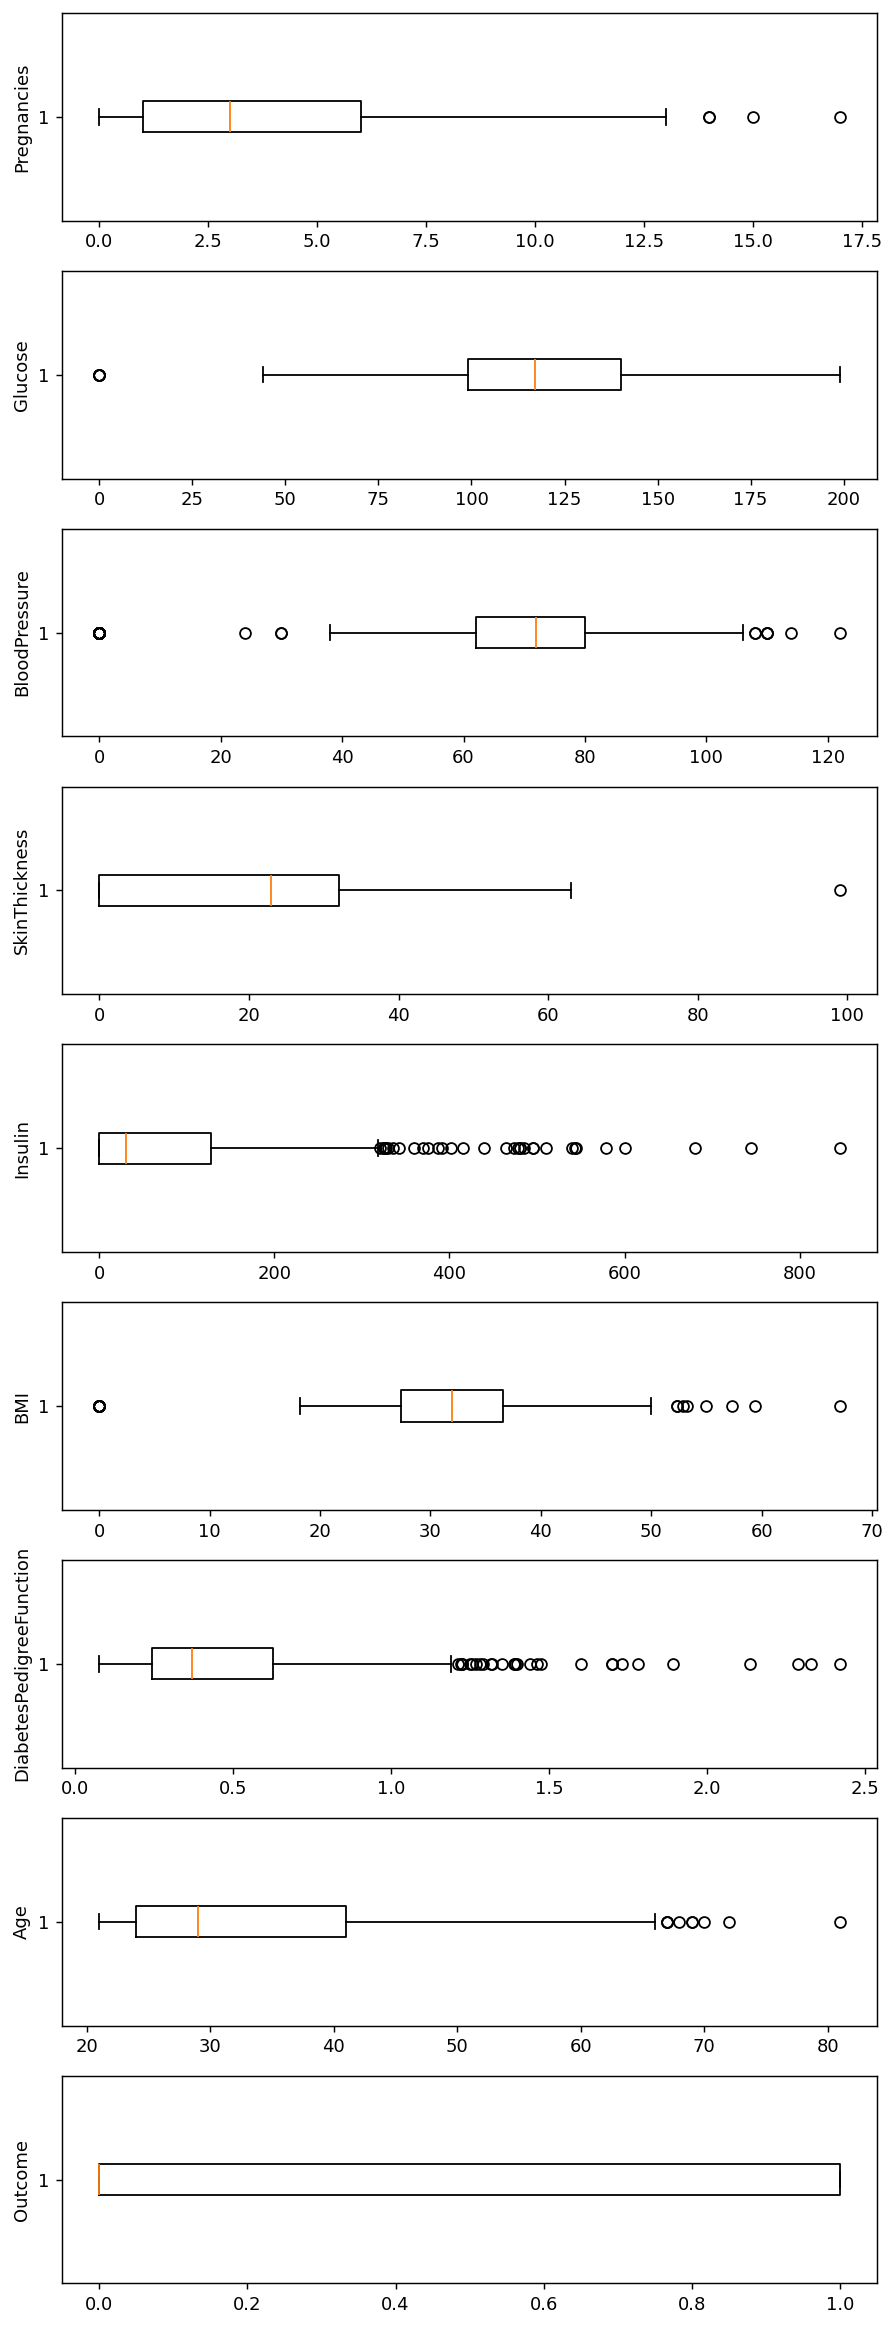

In [51]:
fig,axs=plt.subplots(len(diabetesDf.columns), 1, figsize=(7,18), dpi=130)

for i, column in enumerate(diabetesDf.columns):
    axs[i].boxplot(diabetesDf[column], vert=False)
    axs[i].set_ylabel(column)
plt.tight_layout()
plt.show()

## 4. Remove Outliers using Interquartile Range (IQR) Method
Remove extreme values beyond a reasonable range to improve model robustness.

 Q1 and Q3 = 1.0 : 6.0
Lower and upper = -6.5 : 13.5

 Q1 and Q3 = 97.0 : 133.0
Lower and upper = 43.0 : 187.0

 Q1 and Q3 = 64.0 : 80.0
Lower and upper = 40.0 : 104.0

 Q1 and Q3 = 0.0 : 32.0
Lower and upper = -48.0 : 80.0

 Q1 and Q3 = 0.0 : 115.25
Lower and upper = -172.875 : 288.125

 Q1 and Q3 = 27.2 : 35.8
Lower and upper = 14.300000000000002 : 48.699999999999996

 Q1 and Q3 = 0.238 : 0.564
Lower and upper = -0.25099999999999995 : 1.053

 Q1 and Q3 = 24.0 : 38.0
Lower and upper = 3.0 : 59.0

 Q1 and Q3 = 0.0 : 1.0
Lower and upper = -1.5 : 2.5



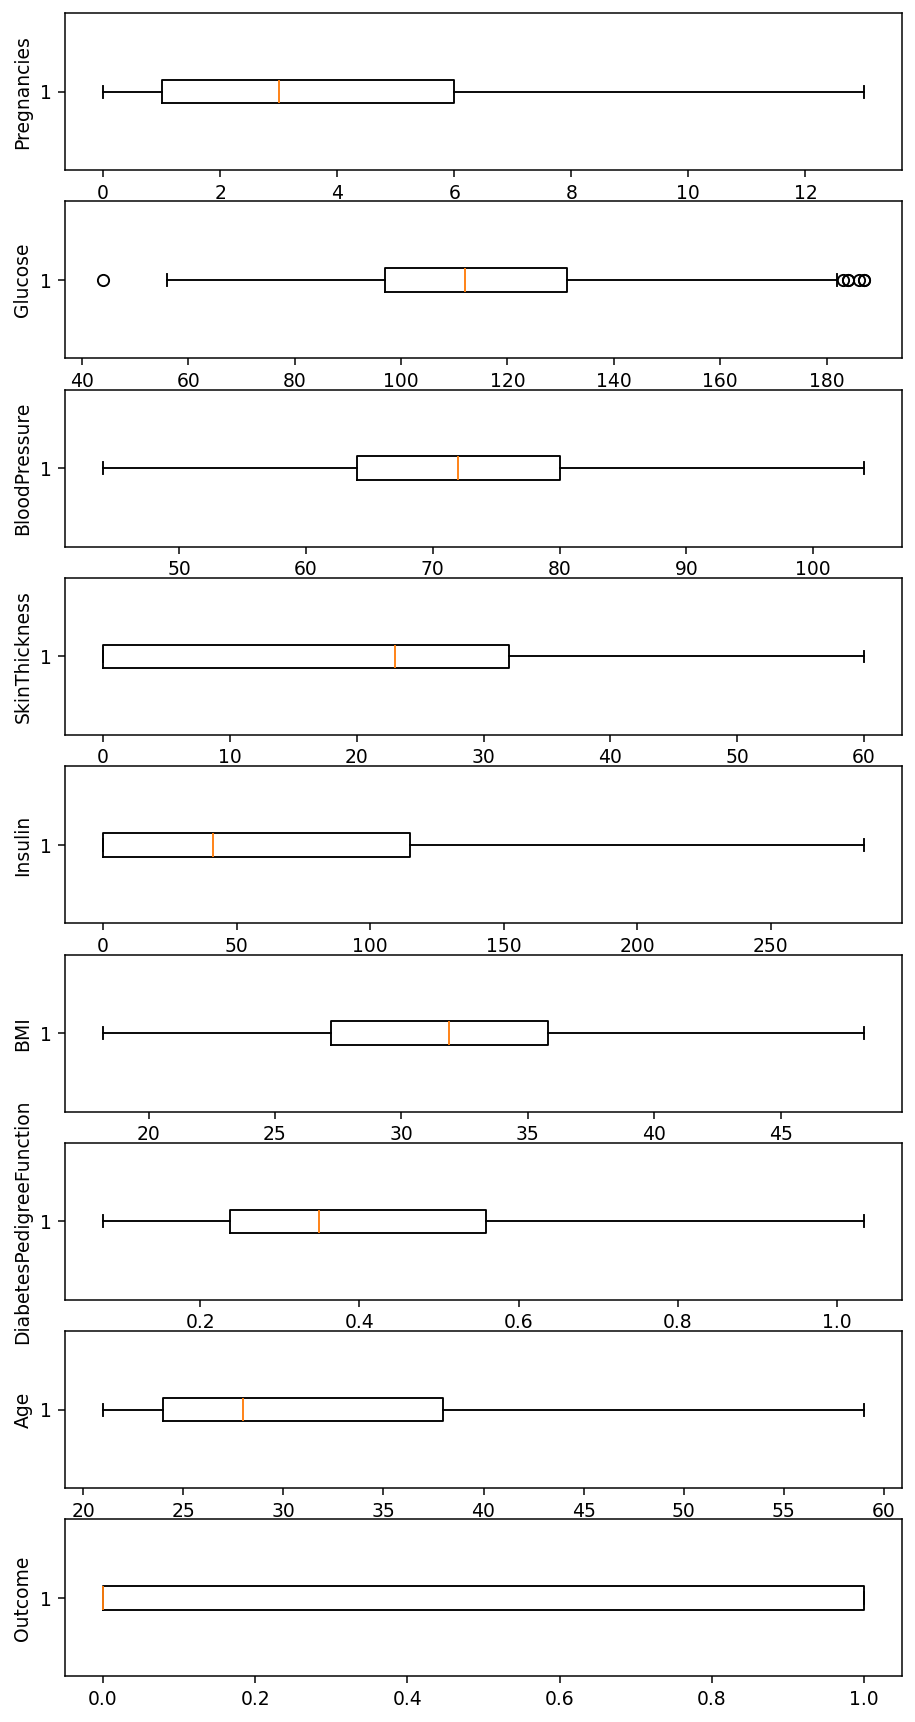

In [57]:
# Column Pregnancies

columns=list(diabetesDf.columns)
fig, subBoxes=plt.subplots(len(columns),1,figsize=(8,16), dpi=135)
i=0
for column in columns:
    #i=columns.index(column)
    diabetesDf=daux.removeOutliers(diabetesDf,column)
    print("")
    subBoxes[i].boxplot(diabetesDf[column], vert=False)
    subBoxes[i].set_ylabel(column)
    i+=1
plt.show()


#diabetesDf=daux.removeOutliers(diabetesDf,"Pregnancies")
#plt.boxplot(diabetesDf["Pregnancies"])
#plt.ylabel("Pregnancies")
#plt.show()

In [53]:
# Column Glucose
"""diabetesDf=daux.removeOutliers(diabetesDf,"Glucose")
plt.boxplot(diabetesDf["Glucose"])
plt.ylabel("Glucose")
plt.show()"""

'diabetesDf=daux.removeOutliers(diabetesDf,"Glucose")\nplt.boxplot(diabetesDf["Glucose"])\nplt.ylabel("Glucose")\nplt.show()'

## 5.Correlation Analysis

Understand relationships between features and the target variable (Outcome). Correlation helps gauge feature importance.

df.corr(): Computes pairwise correlation coefficients between columns.

Heatmap via seaborn visualizes correlation matrix clearly.

Sorting correlations with corr['Outcome'].sort_values() highlights features most correlated with the target.

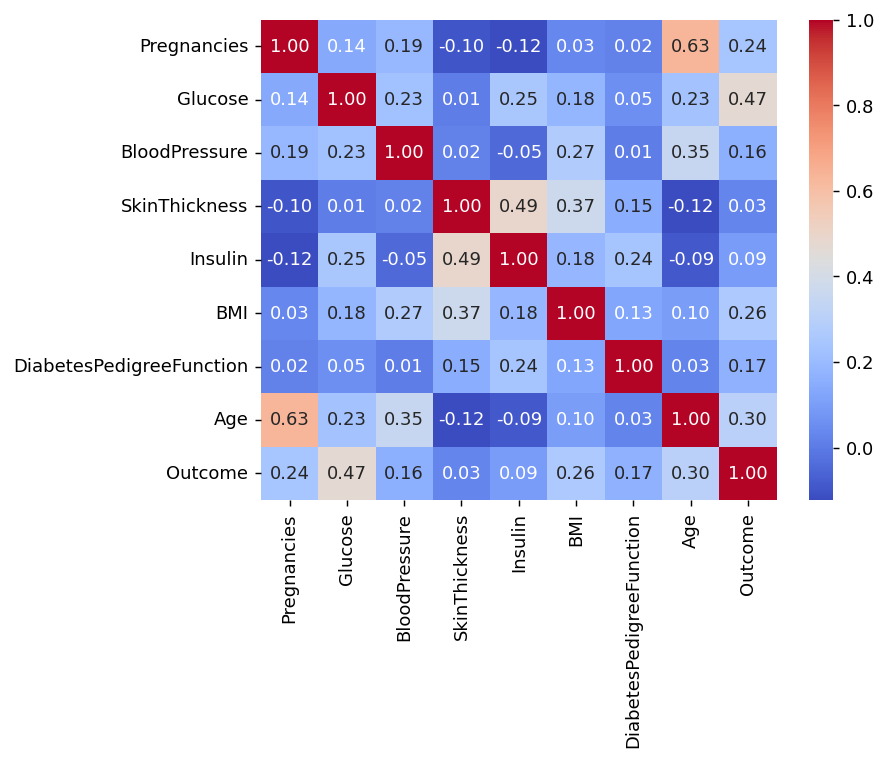

Outcome                     1.000000
Glucose                     0.471691
Age                         0.304393
BMI                         0.260131
Pregnancies                 0.243163
DiabetesPedigreeFunction    0.169632
BloodPressure               0.155218
Insulin                     0.093990
SkinThickness               0.028706
Name: Outcome, dtype: float64


In [62]:
correlation=diabetesDf.corr()
plt.figure(dpi=130)
sns.heatmap(correlation, annot=True, fmt=".2f", cmap="coolwarm")
plt.show()

print(correlation["Outcome"].sort_values(ascending=False))

## 6. Visualize Target Variable Distribution

Check if target classes (Diabetes vs Not Diabetes) are balanced, affecting model training and evaluation.

plt.pie(): Pie chart to display proportion of each class in the target variable 'Outcome'.


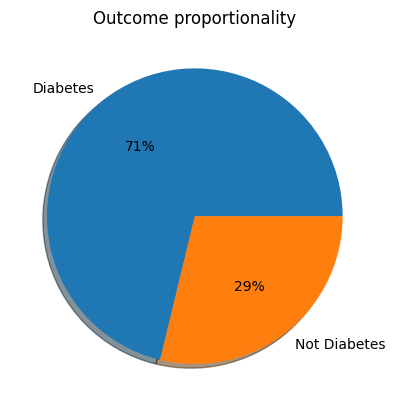

In [64]:
listLabel=["Diabetes","Not Diabetes"]
plt.pie(diabetesDf["Outcome"].value_counts(), labels=listLabel, autopct="%.f%%", shadow=True )
plt.title("Outcome proportionality")
plt.show()

## 7. Separate Features and Target Variables

Prepare independent variables (features) and dependent variable (target) separately for modeling.

df.drop(columns=[...]): Drops the target column from features.

Direct column selection df['Outcome'] selects target column.

In [66]:
X = diabetesDf.drop(columns=["Outcome"])
y=diabetesDf["Outcome"]
X.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
5,5,116,74,0,0,25.6,0.201,30


In [67]:
y.head()

0    1
1    0
2    1
3    0
5    0
Name: Outcome, dtype: int64

## 8. Feature Scaling: Normalization and Standardization

Scale features to a common range or distribution, is important for many ML algorithms sensitive to feature magnitudes.

### 8.1 Normalization (Min-Max Scaling): 

Rescales features between 0 and 1. Good for algorithms like k-NN and neural networks.

Class: MinMaxScaler from sklearn.

.fit_transform(): Learns min/max from data and applies scaling.

In [68]:
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)
print(X_normalized[:5])

[[0.46153846 0.72727273 0.46666667 0.58333333 0.         0.51162791
  0.57426778 0.76315789]
 [0.07692308 0.28671329 0.36666667 0.48333333 0.         0.27906977
  0.28556485 0.26315789]
 [0.61538462 0.97202797 0.33333333 0.         0.         0.16943522
  0.62133891 0.28947368]
 [0.07692308 0.31468531 0.36666667 0.38333333 0.32982456 0.32890365
  0.09309623 0.        ]
 [0.38461538 0.5034965  0.5        0.         0.         0.24584718
  0.12866109 0.23684211]]


### 8.2 Standardization: Transforms features to have mean = 0 and standard deviation = 1, useful for normally distributed features.

Class: StandardScaler from sklearn.

In [70]:
scaler= StandardScaler()
X_standardized= scaler.fit_transform(X)
print(X_standardized[:5])

[[ 0.7100893   1.20823791  0.0445859   0.95063229 -0.85378161  0.29079958
   0.94652763  1.92737158]
 [-0.84306281 -1.16111292 -0.50472504  0.55578058 -0.85378161 -0.82250802
  -0.27033495 -0.04001898]
 [ 1.33135014  2.52454393 -0.68782868 -1.35266933 -0.85378161 -1.34735303
   1.14492914  0.06352789]
 [-0.84306281 -1.01067794 -0.50472504  0.16092887  0.40265987 -0.5839421
  -1.08157667 -1.0754877 ]
 [ 0.39945888  0.00475813  0.22768954 -1.35266933 -0.85378161 -0.98155196
  -0.93167331 -0.14356585]]


## Advantages of data preprocessing

**Improves Data Quality**: Cleans and organizes raw data for better analysis.

**Enhances Model Accuracy**: Removes noise and irrelevant data, leading to more precise predictions.

**Reduces Overfitting**: Handles outliers and redundant features, improving model generalization.

**Speeds Up Training**: Efficiently scaled data reduces computation time.

**Ensures Algorithm Compatibility**: Converts data into formats suitable for machine learning models.